## Lecture 4.4: Logistic Regression from scratch
### Logistic regression implementation
- Logistic regression is the **workhorse** of machine learning.
- Before deep learning era, logistic regression was **the default choice** for solving real life classification problems with hundreds of thousands of features.
- It works with binary, multi-class and multi-label classification setups

### Objective
In this colab, we will implement **binary logistic regression** from scratch and employ it for solving a couple of classification problems

In one of the setting, we have linearly seperable classes and the other has non-linear decision bounday between classes.

The first problem can be addressed with basic logistic regression classifier, while the second problem will require an additional step of **polynomial transformation** before using logistic regression.

These cases will provide an idea about how to use logistic regression to solve classification problems in these two settings. We will setup more such cases for practice in programming course.

Let's begin by importing basic python libraries that are required for implementation:
- `numpy` for implementing components of logistic regression in vectorized form.
- `matplotlib` and `seaborn` for visualization
- `Math` and `Latex` libraries for proper rendering of mathematical expressions in notebook.

In [1]:
#@title [Import libraries]
from IPython.display import display, Math, Latex
# Imported for proper rendering of latex in colab

import numpy as np

#Import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

As a good practice, set the random seed in order to reproduce same results across different runs of this notebook
> We have set it to 1234, you can set it to any number of your choice.

In [2]:
np.random.seed(1234)

### Implementation
In the first part of this notebook, we will implement **individual components** of binary logistic regression one by one:

#### Model
- As you know, the logistic regression classifier calculates the probability of a sample, represented  with feature vector $\mathbf{x}$, belonging to class 1: $\operatorname{Pr}(y=1|\mathbf{x})$
- It has two steps:
    1. **linear combination of features** and
    2. **sigmoid activation**

> Let's apply these steps on a single example and calculate its probability of belonging to class 1
1. The first step performs **linear combination of features** and obtain $z = \mathbf{w}^T\mathbf{x}$.
2. The second step applies **sigmoid or logistic activation** on $z$ to obtain the probability:
$$\begin{align}
\operatorname{Pr}(y=1|\mathbf{x}) &= \operatorname{signmoid}(z) \\
&= \frac{1}{1+e^{-z}}
\end{align}
$$

As we have discussed several times in the past, performing this computation example by example is not efficient. We can make it efficient by rewriting it in vectorized form.

The vectorized form enables us to compute probabilities  for several examples all at once as follows:
1. By vectorizing **linear combination of features** leading to efficient computation:
$$\mathbf{z}_{n × 1} = \mathbf{X}_{n × m}\mathbf{w}_{m × 1}$$
Here:
    - The feature matrix $\mathbf{X}$ has shape $(n,m)$.
    - The weight vector $\mathbf{w}$ has $m$ components and
    - The resulting linear combination $\mathbf{z}$ is a vector with $n$ components.


In [3]:
# Let's implement linear combination in vectorized form
def linear_combination(X:np.ndarray, w:np.ndarray) -> np.ndarray:
    '''
    Calculates linear combination of features.

    The linear  combination is calculated  with the following in vectorized form:
    z = Xw

    Args:
        X: feature matrix with shape (n, m)
        w: weight vector with shape (m, )
    
    Returns:
        Linear combination of features with shape (n, )
    '''
    return X @ w

By vectorizing **sigmoid** or **logistic activation** to obtain a vector of probability or activation:
$$\operatorname{Pr}(\mathbf{y = 1 | X})_{n \times 1} = \operatorname{sigmoid}(\mathbf{z}_{n \times 1})$$
- The sigmoid function is applied on the vector $\mathbf{z}$ with $n$ components and the result is a **probability** or and **activation vector** with $n$ components.

In [4]:
# Let's implement the sigmoid function in a vectorized form
def sigmoid(z: np.ndarray) -> np.ndarray:
    '''
    Calculates the sigmoid of linear  combination of features z.

    Args:
        z: list of floats
    Returns:
        List of output of sigmoid function
    '''
    return 1 / (1 + np.exp(-z))

Further we apply vectorized prediction or inference function on activations to obtain a class label. Specifically, if **activation** or **probability > threshold**, then we label the sample with class 1 or 0.

In [5]:
def predict(X: np.ndarray, w: np.ndarray, threshold: float) -> np.ndarray:
    '''
    Predicts the class label for samples.

    The samples are represented with a bunch of features and are presented in the form
    of feature matrix X. The class label is predicted  as follows:

    * if sigmoid(Xw) > threshold, the sample is labeled with class 1.
    * else class 0.

    Args:
        X: feature matrix of shape (n, m)
        w: weight vector of shape (m, )
        threshold: probability threshold for classification
    Returns:
        A list of class labels of shape (n, )
    '''
    return np.where(sigmoid(linear_combination(X, w)) > threshold, 1, 0)

Let's label a couple of samples through the code that we have written so far:
- Two samples -each with two features -`np.array([[1,20,2],[1,2,2]])` where the first one is dummy feature set to 1 corresponing to bias.
- Weight vector: `np.array([-1,0,1])`

In [6]:
feature_matrix = np.array([[1,20,2],[1,2,2]])
weight_vector = np.array([-1, 0, 1])

print('Shape of feature matrix:', feature_matrix.shape)
print('Shape of weight vector:', weight_vector)

class_labels = predict(feature_matrix, weight_vector,0.5)
print('Shape of output is:', class_labels.shape)
print('The class label vector is:',class_labels)

Shape of feature matrix: (2, 3)
Shape of weight vector: [-1  0  1]
Shape of output is: (2,)
The class label vector is: [1 1]


Both the samples are labelled with class 1.

#### Loss Function
Next we will implement binary cross entropy (BCE) loss with regularization. The base loss without regularization can be obtained by setting the regularization rate $λ$ to 0.

The generic form of loss is as follows:
$$\operatorname{BCE} = {\color{blue}{\text{BCE on training examples}}}+ λ\space{\color{red}{\text{regularization rate}}}$$

Note that the **regularization rate $λ$ controls** the **amount of regularization penalty** to be used.

By setting $λ=0$ we get **Binary Cross Entropy** loss:
$$\begin{align}
\operatorname{BCE} &= {\color{blue}{\text{BCE on training examples}}}+ 0\space{\color{red}{\text{regularization rate}}} \\
&= {\color{blue}{\text{BCE on training examples}}}+ 0 \\
&= {\color{blue}{\text{BCE on training examples}}}
\end{align}
$$
We will use $\text{L}_1$ and $\text{L}_2$ regularization in logistic regression.

With $\text{L}_2$ **regularization**, the loss function is calculated as:
$$
\mathbf{J(w)} = - \left(∑_{i=1}^{n}y^{(i)}\log\left(\operatorname{sigmoid}(\mathbf{w}^Tx^{(i)})\right)+(1-y^{(i)})\log\left(1-\operatorname{sigmoid}(\mathbf{w}^Tx^{(i)})\right)
\right) + λ{\color{blue}{\|w\|^2}}
$$

With $\text{L}_1$ **regularization**, the loss function is calculated as:
$$
\mathbf{J(w)} = - \left(∑_{i=1}^{n}y^{(i)}\log\left(\operatorname{sigmoid}(\mathbf{w}^Tx^{(i)})\right)+(1-y^{(i)})\log\left(1-\operatorname{sigmoid}(\mathbf{w}^Tx^{(i)})\right)
\right) + λ{\color{blue}{\|w\|}}
$$
In order to write the loss in vectorized form, we will first calculate the term inside summation in vectorized form.
$$
\mathbf{e} = \mathbf{y}\log(\operatorname{sigmoid}(\mathbf{Xw})) + (1-\mathbf{y}\log(1-\operatorname{sigmoid}(\mathbf{Xw})))
$$

With this, the loss becomes:
$$
J(\mathbf{w}) = -\mathbf{1}_{1\times n}^T \mathbf{e}_{n \times 1}
$$
**Exercise**: Verify this equality

Adding $\text{L}_2$ penalty we get:
$$
J(\mathbf{w}) = -\mathbf{1}_{1\times n}^T \mathbf{e}_{n \times 1} + λ\mathbf{w}^T\mathbf{w}
$$
Adding $\text{L}_1$ penalty we get:
$$
J(\mathbf{w}) = -\mathbf{1}_{1\times n}^T \mathbf{e}_{n \times 1} + λ\mathbf{1}^T\mathbf{|w|}
$$

The loss function implements vectorized loss calculation with actual label vector, activation vector, weight vector, and $\text{L}_1$ and $\text{L}_2$ regularization

> Set the regularization rate that is not need to 0.

> If we set the regularization rates such that their sum is 1, we get elastic net regularization, In other words for elastic net regularization we have `l1_reg_rate + l2_reg_rate = 1`

The loss function returns a scalar quantity that denotes the loss on all training examples for a particular choice of the weight vector.

In [7]:
def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
    return (-1 * (np.sum(y * np.log(sigmoid_vector) + (1-y) * np.log(1- sigmoid_vector)))
        + l2_reg_rate * np.dot(np.transpose(weight_vector), weight_vector)
        + l1_reg_rate * np.sum(np.abs(weight_vector)))

We will be implementing only $\text{L}_2$ regularization in logistic regression class later in this notebook.


#### Optimization
Next we will implement optimization. For what we will make use of iterative optimization techniques like gradient descent(GD), mini-batch gradient descent (MBGD) or stochastic gradient descent (SGD).

We will demonstrate GD in this notebook and for that we will adopt GD implementation from linear regression.

We need to modify gradient update rule that is suitable for logistic regression loss:
- **STEP 1**: Calculate the **gradient of loss function** and 
- **STEP 2**: Scale the gradient with learning rate and use it for **updating the weight vector**.

#### Gradient of loss function
The gradient of loss function can be calculated ( in vectorized form) as follows:
$$
\frac{∂}{∂\mathbf{w}}J(\mathbf{w}) = \mathbf{X}^T(\operatorname{sigmoid}(\mathbf{Xw})-\mathbf{y}) + λ\mathbf{w}
$$
where
- $\operatorname{sigmoid}(\mathbf{Xw})$ is the sigmoid activation vector of samples and
- $\mathbf{y}$ is the label vector
- $\mathbf{w}$ is a weight vector
- $\lambda$ is a regularization rate.

It is implemented with `calculate_gradient` function that takes feature matrix $\mathbf{X}$, label vector $\mathbf{y}$, weight vector $\mathbf{w}$ and regularization rate $\lambda$ as arguments and efficiently calculates gradient of loss function w.r.t the weight vector in vectorized form.

In [8]:
def calculate_gradient(X: np.ndarray, y:np.ndarray, w:np.ndarray, reg_rate:float) -> np.ndarray:
    '''
    Calculates the gradients of loss function w.r.t weight vector on training set.

    The gradient is calculated with the following vectorized operation:
        np.transpose(X)(sigmoid(Xw) - y) + \lambda w
    Args:
        X: Feature matrix for training data.
        y: Label vector for training data
        reg_rate: regularization rate
    Returns:
        A vector of gradients.
    '''
    return np.transpose(X) @ (sigmoid(linear_combination(X,w)) -y) + reg_rate * w

As part of implementation, we store loss and weight vectors in each GD step as a class member variable.
- The step-wise loss is used for plotting a learning curve in order to ensure that the model is training as expected.
- The step-wise weight vector is useful in studying the **trajectory of gradient descent** in the loss landscape.

**Programming exercises**:
1. Implement SGD for logistic regression classifier.
2. Implement MBGD for logistic regression classifier.

### Logistic Regression class implementation
We combine these different components into a single python class with name `LogisticRegression`.
It has the following class member variables:
1. Weight vector.
2. Loss and weight vectors in each GD step

In [9]:
class LogisticRegression (object):
    '''
    Logistic Regression model.
    y = sigmoid(X,w)
    '''
    def __init__(self):
        self.t0 = 200
        self.t1 = 10000

    def set_weight_vector(self, w):
        self.w = w

    def linear_combination(self, X:np.ndarray) -> np.ndarray:
        '''
        Calculates linear combination of features.

        The linear  combination is calculated  with the following in vectorized form:
        z = Xw

        Args:
        X: feature matrix with shape (n, m)
    
        Returns:
            Linear combination of features with shape (n, )
        '''
        return X @ self.w
    
    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        '''
        Returns probability of input belonging tp class 1

        Args:
            z: list of floats (n, ) np.ndarray
        Returns:
            Sigmoid activation vector (n, ) np.ndarray
        '''
        return 1 / (1 + np.exp(-z))

    def activation(self, X: np.ndarray) -> np.ndarray:
        '''
        Calulates the sigmoid activation for logistic regression.

        The sigmoid activation is calculated with the following vectorized form:
            act = sigmoid(Xw)

        Args:
            X: feature matrix with shape  (n, m)
        Returns:
            activation vector with shape (n, )
        '''
        return self.sigmoid(self.linear_combination(X))
    
    def predict(self, X: np.ndarray, threshold: float = 0.5) -> np.ndarray:
        '''
        Predicts the class label for samples.

        The samples are represented with a bunch of features and are presented in the form
        of feature matrix X. The class label is predicted  as follows:

        * if sigmoid(Xw) > threshold, the sample is labeled with class 1.
        * else class 0.

        Args:
            X: feature matrix of shape (n, m)
            threshold: probability threshold for classification
        Returns:
            A list of class labels of shape (n, )
        '''
        return np.where(self.activation(X) > threshold, 1, 0).astype(int)
    
    def loss(self, X: np.ndarray, y: np.ndarray, reg_rate: float = 0) -> float:
        '''
        Calculates the binary cross entropy loss on training set

        Args:
            X: Feature matrix for training data.
            y: Label vector for training data.
            reg_rate: regularization rate
        Returns:
            loss.
        '''
        predicted_prob = self.activation(X)

        return (-1 * (np.sum(y * np.log(predicted_prob) + (1 - y) * 
                            np.log(1 - predicted_prob))) + reg_rate * np.dot(np.transpose(self.w), self.w))
    
    def calculate_gradient(self, X: np.ndarray, y:np.ndarray, reg_rate:float = 0) -> np.ndarray:
        '''
        Calculates the gradients of loss function w.r.t weight vector on training set.

        The gradient is calculated with the following vectorized operation:
            np.transpose(X)(sigmoid(Xw) - y) + \lambda w
        Args:
            X: Feature matrix for training data.
            y: Label vector for training data
            reg_rate: regularization rate
        Returns:
            A vector of gradients.
        '''
        return np.transpose(X) @ (self.activation(X) - y) + reg_rate * self.w
    
    def update_weights(self, grad: np.ndarray, lr: float) -> np.ndarray:
        '''
        Updates the weights based on gradient of loss function.

        Weight updates are carried out with the following formula:
            w_new = w_old - lr * grad
        
        Args:
            grad: gradient of loss w.r.t w
            lr: learning rate
        Return:
            Updated weight vector.
        '''
        return (self.w - lr * grad)
    
    def gd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, lr: float, reg_rate: float = 0) -> np.ndarray:
        '''
        Estimates parameters of logistic regression through gradient descent

        Args:
            X: Feature matrix of training data.
            y: Label vector of training data.
            num_epochs: Number of training steps
            lr: learning rate
            reg_rate: regularization rate

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            dJdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    
    def learning_schedule(self, t):
        return self.t0 / (t + self.t1)

    def mbgd (self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int, reg_rate:float = 0) -> np.ndarray:
        '''
        Estimates the parameters of logistic regression model through gradient descent

        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            batch_size: Number of examples in a batch
            re_rate: regularization rate

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i: i+batch_size]
                yi = y_shuffled[i: i+batch_size]
                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi,reg_rate))

                dJdw = 2/batch_size * self.calculate_gradient(xi, yi,reg_rate)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))
            
        return self.w
    
    def sgd (self, X: np.ndarray, y:np.ndarray, num_epochs:int, reg_rate:float = 0) -> np.ndarray:
        '''
        Estimates the parameters of logistic regression model through gradient descent

        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            reg_rate: Regularization rate

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        
        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi,yi,reg_rate))

                gradients = 2 * self.calculate_gradient(xi, yi,reg_rate)
                lr = self.learning_schedule(epoch * X.shape[0] +i)
                self.w = self.update_weights(gradients, lr)
        
        return self.w

## Lecture 5.5 Logistic Regression Demonstration
### Demo #1: Logistic regression for linearly separable binary classification

In the first experiment, we will use logistic regression to learn decision boundary between two linearly seperable classes.

**STEP 1**: As the first step , we will generate two linearly separable class with 50 samples each. Each example is represented with two features.

In [10]:
#@title [Toy Data creation]
def create_toy_data():
    x0 = np.random.normal(size = 50).reshape(-1, 2) - 1
    x1 = np.random.normal(size = 50).reshape(-1, 2) + 1
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)

In [11]:
feature_matrix, label_vector = create_toy_data()
print('Shape of feature matrix:', feature_matrix.shape)
print('Shape of label vector:', label_vector.shape)

Shape of feature matrix: (50, 2)
Shape of label vector: (50,)


As a sanity check, compare the first element of shape of feature matrix and label vector. **Make sure they're identical**.

In [12]:
assert feature_matrix.shape[0] == label_vector.shape[0]

The assertion succeeded which means both feature matrix and label list have the same number of rows.

**STEP 2**: Add a dummy feature corresponding to the bias. We make use of polynomial feature transformation code that we have been using in previous notebooks.
> The dummy feature can be added by performing polynomial transformation of degree 1.

In [13]:
#@title [Polynomial transformation]
import itertools
import functools

def get_combinations (x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    # reduce (lambda x, y: x*y,[1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
    return functools.reduce(lambda x, y: x*y, items)

def polynomial_transform(x, degree, logging=False):
    # Converts to feature matrix
    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = [np.ones(len(x))] # Populates 1s as first feature for each example

    if logging:
        print("Input:", x)
    for degree in range(1,degree+1):
        for items in get_combinations(x_t, degree):
            features.append(compute_new_features(items))
            if logging:
                print(items, ":", compute_new_features(items))
    if logging:
        print(np.asarray(features).transpose())
    return np.asarray(features).transpose()

In [14]:
feature_matrix_bias = polynomial_transform(feature_matrix, degree=1)
feature_matrix_bias.shape

(50, 3)

**STEP 3**: Separate the data into training and test sets.

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias,
                                                    label_vector)

It is a good practice to assert that the training feature matrix and labels have the same number of rows. The same assertion should be extended to the test set.

In [16]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

Note that the assertion passed.

**STEP 4**: Let's visualize the training data to get an idea of its distribution.

Note that it won't be possible to visualize real world datasets as they have many features. In this case we only have two features and hence we visualize it.

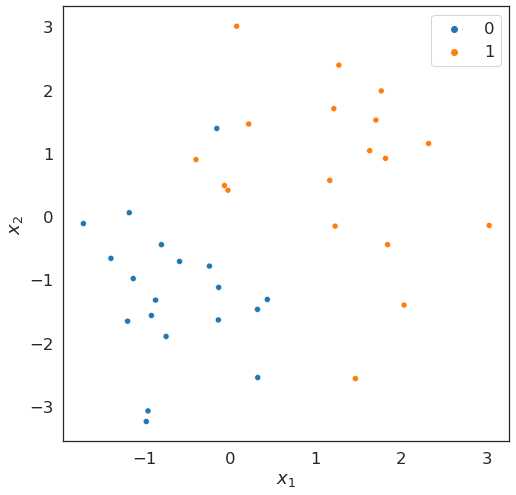

In [17]:
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2.5})

sns.scatterplot(data=x_train, x=x_train[:,-2], y=x_train[:,-1],hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Note that the two classes are linearly separable with most points within the boundary of their classes

**STEP 5**: We are all set to train logistic regression on this problem.
1. First instantiate a logistic regression object.
2. Train the model with gradient descent procedure on the given training set.

In [18]:
log_reg = LogisticRegression()
log_reg.gd(x_train, y_train, num_epochs=100, reg_rate=0, lr=1e-2)

array([-0.09756162,  2.53966629,  1.30442201])

It is good practice to examine the learning curve to make sure the model is able to learn with the current training setup. In cases, where the model is learning, The loss will reduce from one iteration to the next in gradient descent.

In [19]:
def plot_learning_curve(err_all):
    plt.plot(np.arange(len(err_all)), err_all, 'r-')
    plt.xlabel('Iter #')
    plt.ylabel('$\mathbf{J(w)}$')

We use the loss values stored during the each step of GD for plotting the learning curve.
Here is our learning curve - The iteration number on x-axis and the loss is on y-axis.

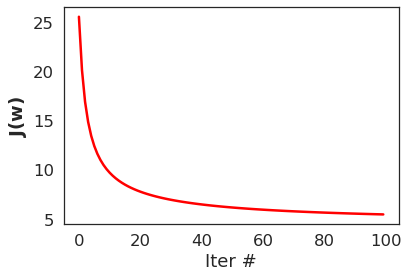

In [20]:
plot_learning_curve(log_reg.err_all)

Note that the loss drops smoothly as we proceed with GD
> This is an ideal training curve for model training task.

**[SWI]** Visualize the loss surface of logistic regression and gradient descent trajectory.

Let's look at the final weight vector learnt by the model.

In [21]:
print('Weight vector:', log_reg.w)

Weight vector: [-0.09756162  2.53966629  1.30442201]


Since the training data has only two features, we can visualize the decision boundary between two classes in 2D.

For this we will reuse the visualization code from the least square and perceptron classifiers.

In [22]:
#@title Model visualization

sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
def visualize_model(X_train, labels, lsc_obj, degree=1):
    
    f = plt.figure(figsize=(8,8))

    # compute xlim and ylim
    x1_min = np.min(X_train[:,1])
    x1_max = np.max(X_train[:,1])
    x2_min = np.min(X_train[:,2])
    x2_max = np.max(X_train[:,2])

    x1_test, x2_test = np.meshgrid(np.linspace(x1_min,x1_max,100), np.linspace(x2_min, x2_max, 100))
    x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = lsc_obj.predict(x_test_poly)

    sns.scatterplot(data=X_train, x=X_train[:,1], y=X_train[:,2], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100, 100), alpha=0.5, levels=np.linspace(0,1,3))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

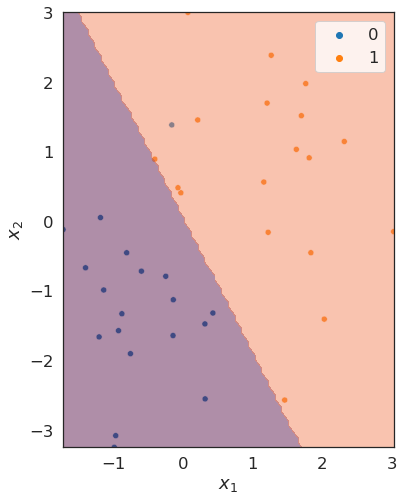

In [23]:
visualize_model(x_train, y_train, log_reg)

Our model learnt a reasonable decision boundary that is able to separate most points from two classes.

**Exercise**: Rerun the model training with different gradient descent settings and notedown  your observations about decision boundary and the final weight vector.

**STEP 6**: Model evaluation
The next step is to use the model for making predictions on the new inputs. Let's predict the labels on the test set - that was set aside for evaluating model performance.

In [24]:
y_test_hat = log_reg.predict(x_test)

We compare these predictions with actual labels and generate the classification report that includes several metrics like confusion matrix, precision, recall, F1 score etc.

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.78      1.00      0.88         7

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



Note that our classifier has `precision` of 0.78 and `recall` of 1.0 on class label 1. The `f1-score` is 0.88

## Lecture 5.6: Polynomial Logistic Regression demonstration.
### Demo #2: Polynomial Logistic Regression
In this second demonstration, we will use logistic regression to fit a circular boundary between two classes.

**STEP 1**: For this demonstration, we will generate samples from two classes such that they are separated by a circular decision boundary

In [26]:
from sklearn.datasets import make_circles
feature_matrix, label_vector = make_circles()

As a sanity check, compare the first element of shape of feature matrix and label vector. **Make sure they are identical**.

In [27]:
assert feature_matrix.shape[0] == label_vector.shape[0]

The assertion succeeded - which means both feature matrix and label list have same number of rows.

**STEP 2**: As a next step, we will make use of polynomial feature transformation to transform the features of polynomials of desired degree.
**Note**:
- It is important to note that we would not have an idea about an appropriate degree of transformation in real world problem setting.
- We perform hyperparameter search to determine the right degree for polynomial transformation.  More about in MLP course.
- Another option is to use model diagnostic tools - in case the model is underfitting, we can make the model fit better by increasing the degree of the polynomial. On the other hand, if the model is overfitting, we can either reduce the degree or increase the regularization penalty.

We use `polynomial_transform` with degree=2 for transforming input features into the second order polynomial features

In [28]:
x_poly = polynomial_transform(feature_matrix, degree=2)

Polynomial feature transformation results in more features. Let's compare number of features before and after the transformation.

In [29]:
print('# features before transformation:', feature_matrix.shape[1])
print('# features after transformation:', x_poly.shape[1])

# features before transformation: 2
# features after transformation: 6


The four additional features are as follows:
1. Dummy feature corresponding to bias. It is set to 1.
2. Squares of original features- which adds two more features: $x_1^2, x_2^2$
3. One more feature corresponding to interaction between features: $x_1x_2$.

Let's look at the first 5 samples from original and transformed feature matrix.

In [30]:
feature_matrix[:5]

array([[-8.00000000e-01, -2.57299624e-16],
       [-1.49905052e-01,  7.85829801e-01],
       [-5.09939192e-01,  6.16410594e-01],
       [-7.93691761e-01, -1.00266587e-01],
       [ 3.40623433e-01, -7.23861642e-01]])

In [31]:
x_poly[:5]

array([[ 1.00000000e+00, -8.00000000e-01, -2.57299624e-16,
         6.40000000e-01,  2.05839699e-16,  6.62030965e-32],
       [ 1.00000000e+00, -1.49905052e-01,  7.85829801e-01,
         2.24715245e-02, -1.17799857e-01,  6.17528475e-01],
       [ 1.00000000e+00, -5.09939192e-01,  6.16410594e-01,
         2.60037979e-01, -3.14331920e-01,  3.79962021e-01],
       [ 1.00000000e+00, -7.93691761e-01, -1.00266587e-01,
         6.29946612e-01,  7.95807639e-02,  1.00533884e-02],
       [ 1.00000000e+00,  3.40623433e-01, -7.23861642e-01,
         1.16024323e-01, -2.46564238e-01,  5.23975677e-01]])

Note that the second and the third feature are original features, whereas the first, fourth, fifth and sixth features are newly added features during transformation.

**STEP 3**: Split the training set consisting of transformed feature matrix and label vector into train and test sets.

For this we-will nake use of `train_test_split` util from `sklearn` that takes feature matrix and label vector as input and returns train and test feature matrices and label vector.

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_poly, label_vector)

It is a good practice to assert that the training feature matrix and labels have the same number of rows. The same assertion should be extended to the test set.

In [33]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

**STEP 4**: Next we plot the training data in original feature space and check its distributions.

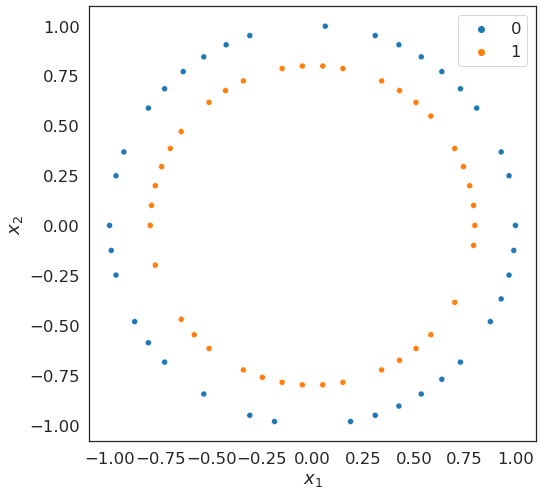

In [34]:
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2.5})

sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2],hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

**STEP 5**: Train a logistic regression model on the training set and visualize the model.

In [35]:
log_reg_poly = LogisticRegression()
log_reg_poly.gd(x_train, y_train, num_epochs=10000, reg_rate=0, lr=1e-2)

array([ 2.03212877e+01, -3.62360899e-02,  7.36788518e-03, -2.49434641e+01,
        1.06058158e-01, -2.47207876e+01])

We use loss values stored during each step of GD for plotting the learning curve.

Here's our learning curve - the iteration number is on x-axis and the loss in on y-axis.

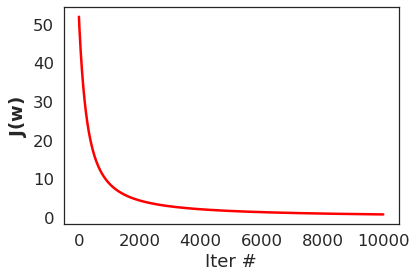

In [36]:
plot_learning_curve(log_reg_poly.err_all)

We will visualize the decision boundary learnt by the logistic regression classifier.

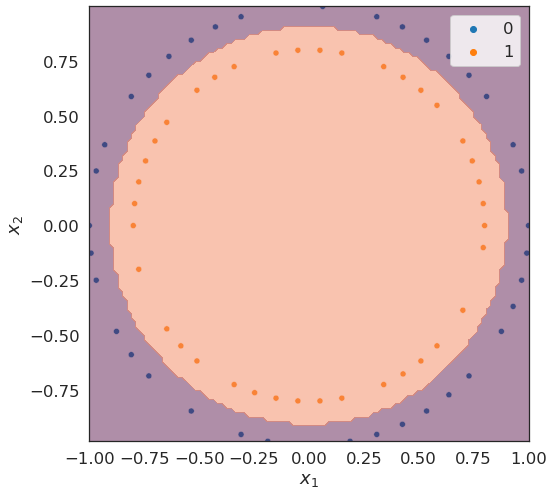

In [37]:
visualize_model(x_train, y_train, log_reg_poly, degree=2)

You can see that the model has learnt the circular decision boundary. Note that we are able to fit such a decision boundary due to polynomial transformation of degree 2.

**STEP 6**: Model evaluation \
The next step is to use the model for making predictions on the new inputs. Let's predict the labels on the test set - that was set aside for evaluating model performance.

In [38]:
y_test_hat = log_reg_poly.predict(x_test)

We compare these predictions with actual labels and generate the classification report that includes several metrics like confusion matrix, precision, recall, F1 score etc.

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



**Note** that we have a perfect classifier here. It was a toy setting - however such thing may not be possible on the real world dataset.

**SWI** \
1. Train logistic regression classifier with polynomial transformation of different degrees

## Lecture 5.7: Logistic Regression Visualization

### Loss Surface

We had visualized logistic regression loss function in the slides.
Here's the step by step process to generate this visualization:
1. Generate a grid of weights - $w_1$ and $w_2$.
2. For each point on the grid, calculate the cross entropy loss on the fix training set.
3. Plot contour of weights and losses.

The basic idea here is to calculate loss for each given weight vector on the fixed estimator and training set.

In [40]:
from matplotlib import cm # Colormaps
from matplotlib.colors import colorConverter, ListedColormap

We need to instantiate a logistic regression estimator for cross entropy calculation.

In [41]:
log_reg_vis = LogisticRegression()

We also need training data for calculation of loss for a given weight vector.

In [42]:
feature_matrix, label_vector = create_toy_data()
feature_matrix_bias = polynomial_transform(feature_matrix, degree =1)
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias, label_vector)

In [43]:
x_train.shape

(37, 3)

Next we generate a grid of 25 weights

In [44]:
point_count = 25
w1 = np.linspace(-5, 5, num=point_count)
w2 = np.linspace(-5, 5, num=point_count)
w1_list, w2_list = np.meshgrid(w1, w2) # generate grid

Calculate the loss at each point on the grid.

In [45]:
loss = np.zeros((point_count, point_count)) # Initialize the matrix

#Fill the loss matrix for each combination of weights
for i in range(point_count):
    for j in range(point_count):
        weight_vector = np.array([0, w1_list[i,j], w2_list[i,j]])
        log_reg_vis.set_weight_vector(weight_vector)
        loss[i,j] = log_reg_vis.loss(x_train, y_train, reg_rate=0)
    

Now plot the loss surface.

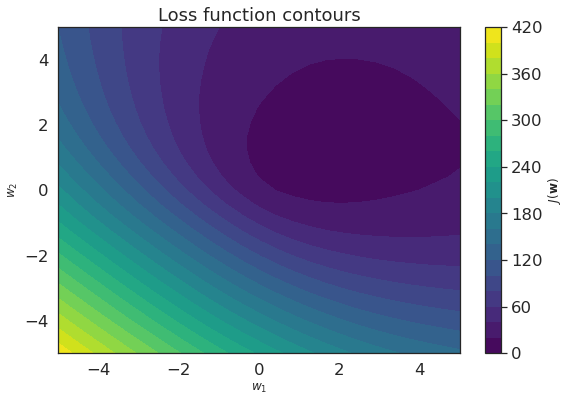

In [46]:
# Plot the loss function surface
plt.figure(figsize=(9, 6))
plt.contourf(w1_list, w2_list, loss, 20, cmap= cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$J(\mathbf{w})$', fontsize=12)
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Loss function contours')
plt.grid()
plt.show()

### Gradient descent trajectory

In [47]:
log_reg_vis.gd(x_train, y_train, num_epochs=1000, reg_rate=0, lr=1e-2)

array([0.6958067 , 1.61362475, 0.87521977])

Here we make use of weights stored during the gradient descent procedure.

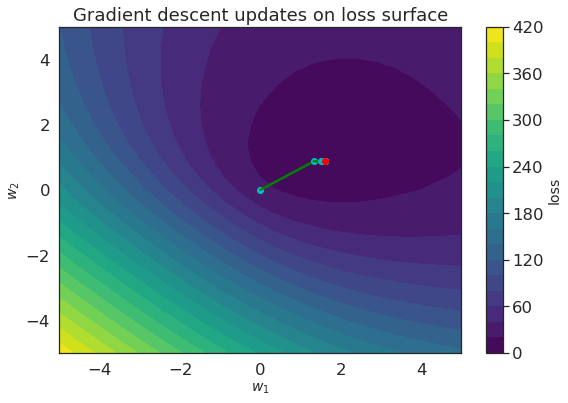

In [48]:
# First plot the loss contours based on the grid in the previous subsection.
plt.figure(figsize=(9, 6))
plt.contourf(w1_list, w2_list, loss, 20, cmap= cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss', fontsize=14)

#Plot weights after each few epochs
for i in range(1, 900, 50):
    w1 = log_reg_vis.w_all[(i-1)]
    w2 = log_reg_vis.w_all[(i+50)]

    # Plot the weight loss values that represents the update
    plt.plot(w1[1], w1[2], marker='o', color='c') # Plot the weight-loss value
    plt.plot([w1[1], w2[1]], [w1[2], w2[2]], linestyle='-', color='g')

# Plot the last-weight
w1 = log_reg_vis.w_all[-1]
plt.plot(w1[1],w1[2],marker='o',color='r')

#Show figure
plt.xlabel('$w_1$', fontsize=14)
plt.ylabel('$w_2$', fontsize=14)
plt.title('Gradient descent updates on loss surface')
plt.show()